In [7]:
include("../code/headers.jl")

Run MaxSum on instances with variable degree profile $(\lambda_1, 1-\lambda_1)$

In [31]:
n = 10000
m = 9000
b = round.(Int, m .* (0.1:0.1:0.9))
rates = zeros(length(b))
dist = zeros(length(b))
lambda1 = zeros(length(b))
ms = MS(maxiter=1000, sigma=1e-10, gamma=1e-3, Tmax=5, convergence=:parity)
for j in eachindex(b)
    fg = ldpc_graphGF2(n,m)
    # Remove b factors
    breduction!(fg, b[j])
    # Get degree profile (in terms of node degrees)
    lambda,rho = polyn(fg)
    lambda1[j] = lambda[1]
    rates[j] = size(lightbasis(fg),2)/fg.n
    # Solve with MS
    y = rand([0,1], fg.n)
    res = bp!(fg, ms, y)
    dist[j] = res.distortion
end

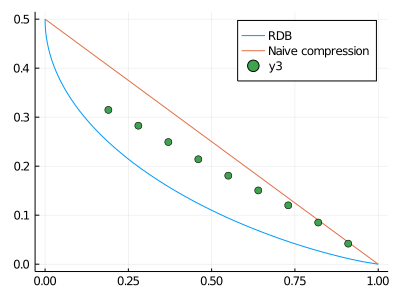

In [35]:
d = LinRange(0,0.5,100)
r = LinRange(0, 1, 100)
pl = Plots.plot(rdb.(d), d, label="RDB")
Plots.plot!(pl, r, naive_compression_inv.(r), label="Naive compression")
scatter!(pl, rates, dist, size=(400,300))

In [33]:
lambda1

9-element Array{Float64,1}:
 0.1802
 0.3239
 0.4179
 0.48160000000000003
 0.4959
 0.4878
 0.42460000000000003
 0.32
 0.1786